## The purpose of this file
Delve into time evolving network constructed from hashtag search on "じゃけぇ広島に恋しとる".

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import toolbox as tb
%matplotlib inline

In [2]:
tag = "explore_hiroshima"
hashtag = "じゃけぇ広島に恋しとる" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "21-29"
file = f"../data/datasets/{tag}/{tag}_{timespan}.pkl"
df = tb.get_dataframe(hashtag, file)

In [3]:
tau, snapshots = tb.get_snapshots_closed_intervals(df, 'hours=1')
#tau, snapshots = tb.get_snapshots_closed_intervals(df, 'minutes=30')
print(f"tau = {tau}")

tau = 235


In [4]:
N, L = tb.evolution_of_network(df,tau, snapshots)

In [5]:
# Calculate average degree <k>
k_braket = []
for n, l in zip(N, L):
    k_braket.append(2*l / n)

In [6]:
df = pd.DataFrame({"tau": np.arange(1, tau+1), "N": N, "L": L, "<k>": k_braket})
#df.to_pickle(f'../data/time_evolution/{tag}/time-evolution_{timespan}_{tau}.pkl')
df.head()

,tau,N,L,<k>
0,1,20,190,19.000000
1,2,20,190,19.000000
2,3,20,190,19.000000
3,4,46,619,26.913043
4,5,50,724,28.960000


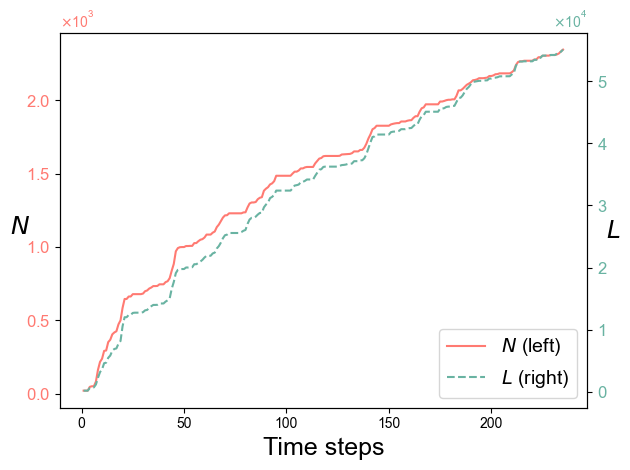

In [8]:
fname = f"../data/figure/time_evolution/time-evolution_{tag}_{timespan}_{tau}.pdf"
print(fname)
tb.plot_time_evolution(df, ncolor="#FF7A72", lcolor="#69B3A2")